In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [5]:
data = pd.read_csv("delhivery_data.csv")

# Definition of problem-
Given data is in raw form which came directly out of data engineering piplines. We have to process this data so that the company can understood it better. So,we will clean, sanitize and manipulate the data to get useful features out of raw fields so that the data could make some sense which would help the data science team to build forcasting models on it.
To solve this problem we will do the following steps- <br>
- Feature Creation <br> 
- Relationship between Features <br> 
- Column Normalization /Column Standardization <br> 
- Handling categorical values <br> 
- issing values - Outlier treatment / Types of outliers


# Drop unknown columns.

In [6]:
unknown_cols = ['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor']
data.drop(unknown_cols,axis = 1,inplace = True)

# Observations on shape of data, data types of all the attributes.

In [7]:
data.shape

(144867, 19)

In [8]:
data['trip_uuid'].nunique()

14817

In [9]:
data.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


<div class="alert alert-block alert-warning">
<b>Insight:</b> <br>
- We can see in the above subset of data that there are multiple rows for single trip. <br>
- There are multiple unknown columns.
</div>

In [10]:
data.dtypes 

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
dtype: object

#  Conversion of categorical attributes

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [12]:
cols = data.columns
cat_cols = ['data','route_type']
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time','segment_orsm_distance']
dt_cols = ['trip_creation_time','od_start_time','od_end_time'] 
data[dt_cols] = data[dt_cols].astype('datetime64')
# converting to datetime data type.

# Statistical summary. Analyzing basic things like count,mean,min,max etc

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [14]:
data.describe(include = 'object').T

,count,unique,top,freq
data,144867,2,training,104858
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192


<div class="alert alert-block alert-warning">
<b>Insights:</b> <br>
- There are only 1504 routes which are used for 14817 trips. <br>
- Gurgaon center is most frequently used.
</div>

# Non Graphical Analysis: Value Count and Unique Attributes.

In [15]:
for col in data.columns:
    l = len(col)
    if l< 7: print(col, "\t\t\t\t:", data[col].nunique()) 
    elif l== 16: print(col, "\t\t:", data[col].nunique()) 
    elif l< 16: print(col, "\t\t\t:", data[col].nunique()) 
    elif l<30: print(col, "\t\t:",data[col].nunique()) 
    else: print(col, "\t:", data[col].nunique())

data 				: 2
trip_creation_time 		: 14817
route_schedule_uuid 		: 1504
route_type 			: 2
trip_uuid 			: 14817
source_center 			: 1508
source_name 			: 1498
destination_center 		: 1481
destination_name 		: 1468
od_start_time 			: 26369
od_end_time 			: 26369
start_scan_to_end_scan 		: 1915
actual_distance_to_destination 	: 144515
actual_time 			: 3182
osrm_time 			: 1531
osrm_distance 			: 138046
segment_actual_time 		: 747
segment_osrm_time 		: 214
segment_osrm_distance 		: 113799


## Unique count for each feature unique value

In [16]:
for col in cat_cols:
    print('\n',data[col].value_counts())


 training    104858
test         40009
Name: data, dtype: int64

 FTL        99660
Carting    45207
Name: route_type, dtype: int64


## Missing values

In [17]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [18]:
mask =data["source_name"].isnull()
source_name_null_data= data[mask]
source_name_null_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,22.783440,48.0,34.0,37.7749,48.0,34.0,37.7749
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,46.071250,98.0,41.0,56.3575,49.0,33.0,34.1661
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,67.714993,127.0,58.0,80.4811,29.0,17.0,24.1236
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,88.149642,156.0,73.0,101.2556,28.0,14.0,20.7746
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,112.691981,212.0,92.0,127.9860,55.0,18.0,26.7304


In [19]:
mask= data["destination_name"].isnull()
dest_name_null_data= data[mask]
dest_name_null_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
110,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,24.538214,58.0,33.0,30.8845,58.0,33.0,30.8845
111,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,34.657709,110.0,43.0,41.5361,52.0,10.0,10.6517
982,test,2018-10-01 20:56:18.155260,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153842737815495661,IND573103AAA,Arsikere_HsnRdDPP_D (Karnataka),IND577116AAA,NaN,2018-10-02 01:22:21.450243,2018-10-02 02:07:27.840862,45.0,22.029639,21.0,16.0,22.9630,21.0,16.0,22.9630
983,test,2018-10-01 20:56:18.155260,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153842737815495661,IND573103AAA,Arsikere_HsnRdDPP_D (Karnataka),IND577116AAA,NaN,2018-10-02 01:22:21.450243,2018-10-02 02:07:27.840862,45.0,35.528960,36.0,25.0,36.5050,15.0,9.0,13.5420
4882,training,2018-09-24 07:18:06.087341,thanos::sroute:2f43f11e-d3ba-4590-9355-82928e1...,FTL,trip-153777348608709328,IND202001AAB,Aligarh_KhirByps_I (Uttar Pradesh),IND282002AAD,NaN,2018-09-24 15:02:13.760270,2018-09-24 18:49:23.454535,227.0,22.193687,40.0,26.0,28.9817,40.0,26.0,28.9817


In [20]:
data['source_name'].fillna(data['source_center'],inplace = True)
data['destination_name'].fillna(data['destination_center'],inplace = True)

<div class="alert alert-block alert-warning">
<b>Insight:</b> Some Values of Source Name and destination_name are missing
</div>

# Merging of rows and aggregation of fields

In [21]:
d1 = data
d1.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


In [22]:
grp = d1.groupby(['data','trip_creation_time','route_schedule_uuid','route_type','trip_uuid','source_name','destination_name','od_start_time','od_end_time','start_scan_to_end_scan'])[['actual_distance_to_destination','actual_time','osrm_distance','osrm_time']]
d1 = grp.max()
d1= d1.reset_index()
d1.sort_values(['trip_uuid','trip_creation_time','od_start_time'],inplace = True,ascending = True)
d1.head()
# grouped data by trip_uuid,destination_name,source_name

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_distance,osrm_time
7421,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,544.8027,394.0
7422,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,446.5496,349.0
7424,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,56.9116,42.0
7423,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,28.1994,26.0
7425,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,2090.8743,1529.0


In [23]:
def select_first(d):           #creating function for selecting the value from first row in grouped data
    return d.iloc[0]

def select_last(d):           #creating function for selecting the value from last row in grouped data
    return d.iloc[-1]
    
grp = d1.groupby(['data','trip_creation_time','route_schedule_uuid','route_type','trip_uuid'])[['source_name','destination_name','od_start_time','od_end_time','start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_distance','osrm_time']]
d2 = grp.aggregate({'source_name':select_first,'destination_name':select_last,'od_start_time':select_first,'od_end_time':select_last,'start_scan_to_end_scan':'sum','actual_distance_to_destination':'sum','actual_time':'sum','osrm_distance':'sum','osrm_time':'sum'})
d2= d2.reset_index()
d2.sort_values(['trip_uuid','trip_creation_time'])
d2.head()
# grouped data by each trip id

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_distance,osrm_time
0,test,2018-09-27 00:02:18.970980,thanos::sroute:a02b2c7d-49c4-4c7f-956e-b4b22a1...,Carting,trip-153800653897073708,Dhule_MIDCAvdn_I (Maharashtra),Chalisgaon_BhadgDPP_D (Maharashtra),2018-09-27 00:02:18.970980,2018-09-27 02:28:08.036773,145.0,54.371063,128.0,57.5437,41.0
1,test,2018-09-27 00:02:29.352390,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153800654935210748,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-27 00:02:29.352390,2018-09-27 01:23:35.904326,81.0,17.774611,58.0,21.7310,17.0
2,test,2018-09-27 00:03:08.209931,thanos::sroute:a8c7e9f0-237d-47a1-9024-a48afeb...,FTL,trip-153800658820968126,Jaipur_Hub (Rajasthan),Gurgaon_Bilaspur_HB (Haryana),2018-09-27 00:03:08.209931,2018-09-27 10:13:54.663547,610.0,196.041263,334.0,220.8430,163.0
3,test,2018-09-27 00:03:14.680535,thanos::sroute:ee21b51f-7d22-4406-9a1b-ad789eb...,Carting,trip-153800659468028518,Mumbai_Kalyan (Maharashtra),Mumbai_East_I_21 (Maharashtra),2018-09-27 02:37:15.362086,2018-09-27 04:21:45.871140,104.0,9.198088,27.0,11.5549,9.0
4,test,2018-09-27 00:03:37.296972,thanos::sroute:279c8da0-73fc-4194-be37-988b25b...,Carting,trip-153800661729668086,Surat_Central_D_12 (Gujarat),Surat_Central_I_4 (Gujarat),2018-09-27 02:13:23.273586,2018-09-27 06:02:15.316360,228.0,13.411425,132.0,18.1836,17.0


<div class="alert alert-block alert-warning">
<b>Insight:</b><br>- We reduced 144316 rows into 14817 rows <br>
    - Columns are reduced to just 11.
</div>

## Duplicate rows (if any)

In [24]:
d2[d2.duplicated()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_distance,osrm_time


No duplicate rows.

# Feature Engineering

## Splitting source_name and source_destination

In [25]:
import re
def getting_state(x):
    s = re.findall(r'\(.*?\)',x)
    if len(s)== 0:
        return x
    else:
        s= s[0]
        ss = ''
        for a in s:
            if a.isalpha():
                ss = ''.join([ss,a])
    return ss

In [31]:
d2['source_state']= d2['source_name'].apply(getting_state)
d2['destination_state']= d2['destination_name'].apply(getting_state)

In [32]:
split_source = d2['source_name'].str.split()
split_destination = d2['destination_name'].str.split()
d2['source_city']= split_source.apply(lambda x : x[0]).str.split('_').apply(lambda x : x[0])
d2['destination_city'] = split_destination.apply(lambda x : x[0]).str.split('_').apply(lambda x : x[0])

## Splitting Trip Creation Time

In [33]:
d2['trip_creation_year']= d2['trip_creation_time'].dt.year
d2['trip_creation_month'] = d2['trip_creation_time'].dt.month
d2['trip_creation_day'] = d2['trip_creation_time'].dt.day
d2['trip_creation_weekday'] = d2['trip_creation_time'].dt.day_name(locale= 'English')
d2['trip_creation_hour'] = d2['trip_creation_time'].dt.hour

## Calculate the time taken between od_start_time and od_end_time 

In [34]:
d2['od_time_taken']= (d2['od_end_time']-d2['od_start_time'])/pd.Timedelta(minutes=1)

# Handling Categorical Values-

## one-hot encoding of categorical variable-data-

In [35]:
dummies = pd.get_dummies(d2.data,drop_first = True)

In [36]:
d2= pd.concat([d2,dummies],axis =1)

## one-hot encoding of categorical variable-route-type-

In [37]:
dummies = pd.get_dummies(d2.route_type,drop_first=True)

In [38]:
d2= pd.concat([d2,dummies],axis =1)

# Visual Analysis

## Numerical Features

## Finding outliers in each numerical feature

In [39]:
def detect_outliers(df, col): 
    q1= df[col].quantile(0.25) 
    q3= df[col].quantile(0.75) 
    iqr= q3- q1 
    outlier_left= q1- (1.5 * iqr) 
    outlier_right= q3+ (1.5 * iqr) 
    return outlier_left,outlier_right

## Outlier ditection and handling- start_scan_to_end_scan

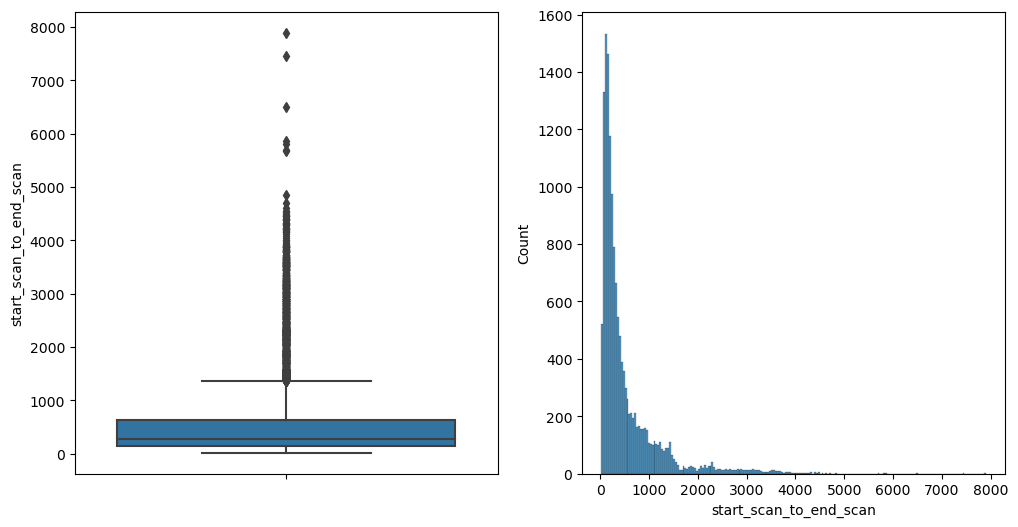

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data = d2,y='start_scan_to_end_scan')
plt.subplot(122)
sns.histplot(data = d2,x = 'start_scan_to_end_scan')
plt.show()

<div class="alert alert-block alert-warning">
    <b>Insight:</b><br> - Data is right skewed. <br>
    - We cant remove the outliers because long time could be due to long distances.
</div>

In [41]:
detect_outliers(d2,'start_scan_to_end_scan')

(-583.0, 1369.0)

In [42]:
d2['start_scan_to_end_scan'].mean()

530.8237160018897

In [43]:
d2[d2['start_scan_to_end_scan']>=1369]['start_scan_to_end_scan'].mean()

2274.444356748224

## Outlier ditection and handling- actual_distance_to_destinaiton


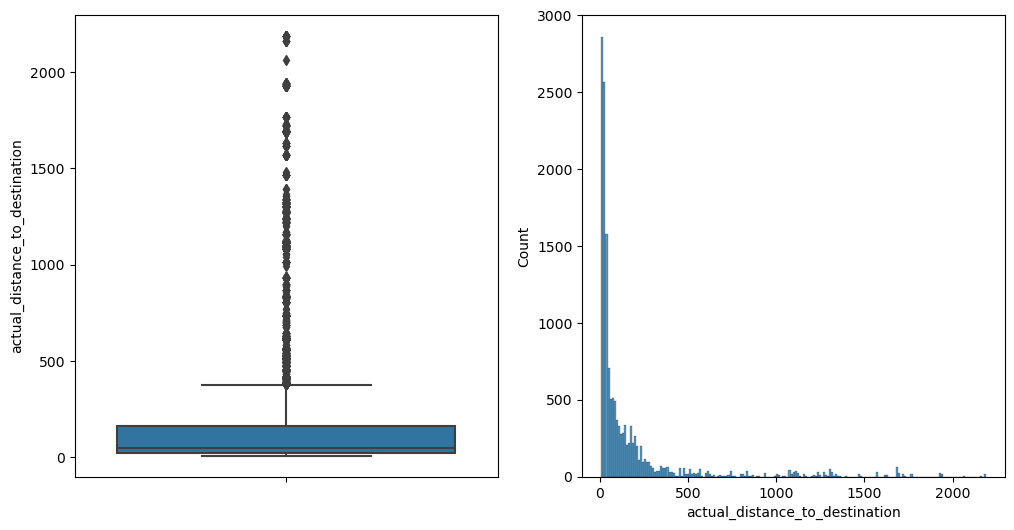

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data = d2,y='actual_distance_to_destination')
plt.subplot(122)
sns.histplot(data = d2,x ='actual_distance_to_destination')
plt.show()

<div class="alert alert-block alert-warning">
    <b>Insight:</b><br> - Data is right skewed. <br>
    - Most of the distance is below 300.
</div>

In [45]:
detect_outliers(d2,'actual_distance_to_destination')

(-190.12991073629408, 377.8432652176542)

# Univariate analysis-

## Source and destination states

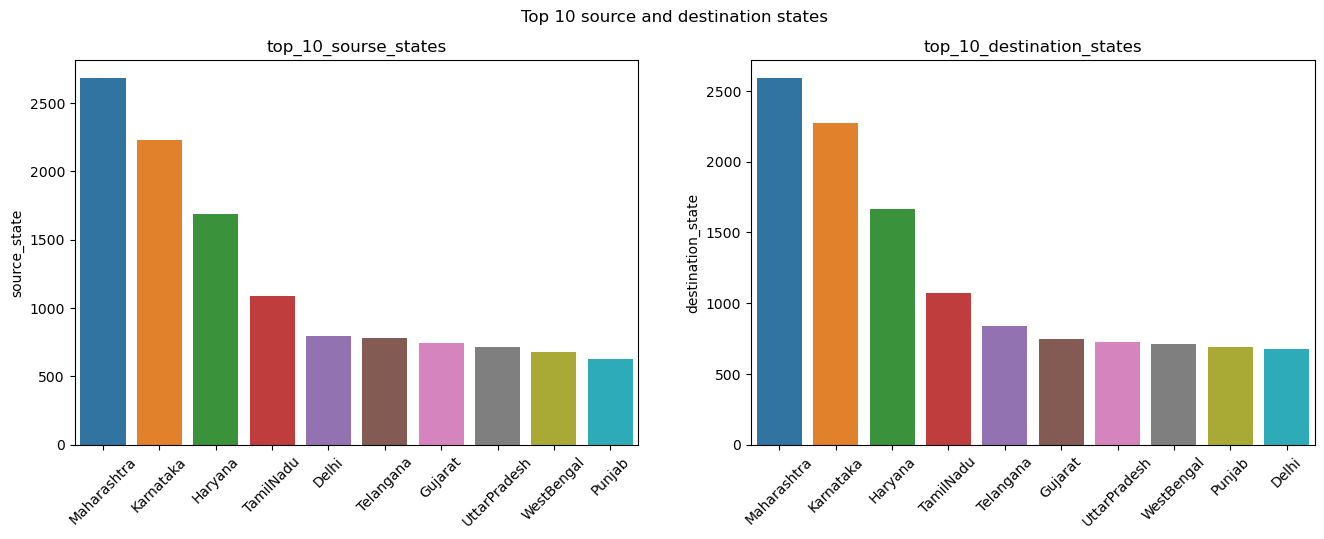

In [46]:
top_10_states_source = d2['source_state'].value_counts().iloc[0:10]
top_10_destination_states = d2['destination_state'].value_counts().iloc[0:10]

fig, ax= plt.subplots(1,2,figsize=(16,5))

sns.barplot(y = top_10_states_source, x = top_10_states_source.index,ax = ax[0] ).set(title= 'top_10_sourse_states')
ax[0].set_xticklabels(top_10_states_source.index,rotation = 45)

sns.barplot(y = top_10_destination_states, x = top_10_destination_states.index,ax = ax[1] ).set(title= 'top_10_destination_states')
ax[1].set_xticklabels(top_10_destination_states.index,rotation = 45)

plt.suptitle("Top 10 source and destination states")
plt.show()

<div class="alert alert-block alert-warning">
    <b>Insight:</b><br> - Maharashtra,Karnataka,Haryana are most popular source and destination states
</div>

## Source and destination cities.

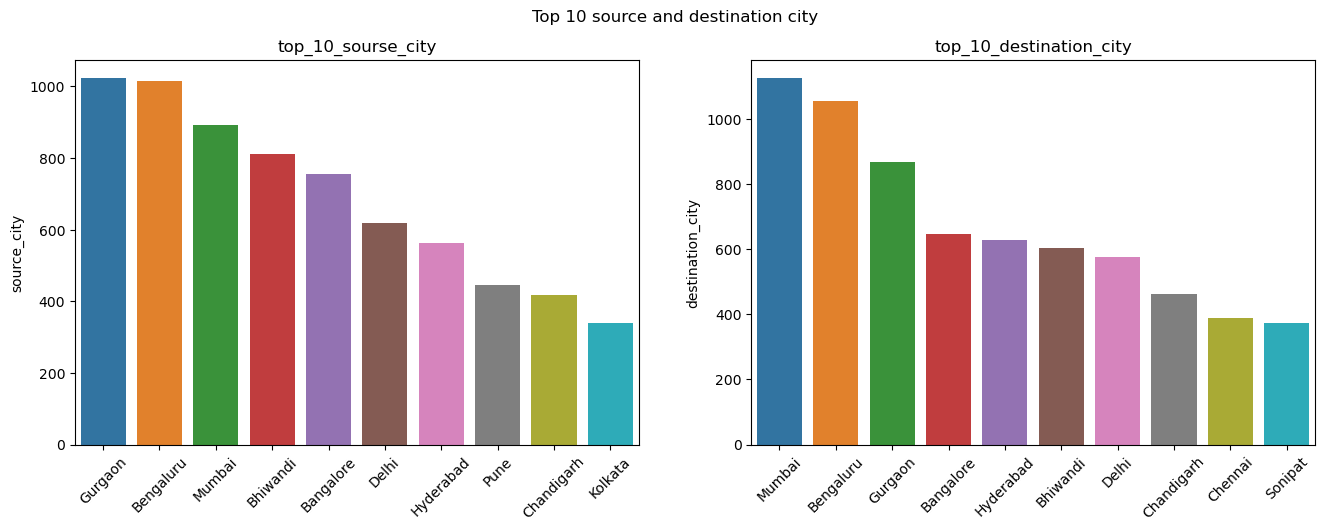

In [47]:
top_10_city_source = d2['source_city'].value_counts().iloc[0:10]
top_10_destination_city = d2['destination_city'].value_counts().iloc[0:10]

fig, ax= plt.subplots(1,2,figsize=(16,5))

sns.barplot(y = top_10_city_source, x = top_10_city_source.index,ax = ax[0] ).set(title= 'top_10_sourse_city')
ax[0].set_xticklabels(top_10_city_source.index,rotation = 45)

sns.barplot(y = top_10_destination_city, x = top_10_destination_city.index,ax = ax[1] ).set(title= 'top_10_destination_city')
ax[1].set_xticklabels(top_10_destination_city.index,rotation = 45)

plt.suptitle("Top 10 source and destination city")
plt.show()

<div class="alert alert-block alert-warning">
    <b>Insight:</b><br> - Gurgaon,Benglure and Mumbai are most popular source and destination cities
</div>

In [48]:
d2.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_name', 'destination_name', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_distance',
       'osrm_time', 'source_state', 'destination_state', 'source_city',
       'destination_city', 'trip_creation_year', 'trip_creation_month',
       'trip_creation_day', 'trip_creation_weekday', 'trip_creation_hour',
       'od_time_taken', 'training', 'FTL'],
      dtype='object')

# Trip-creation timeline

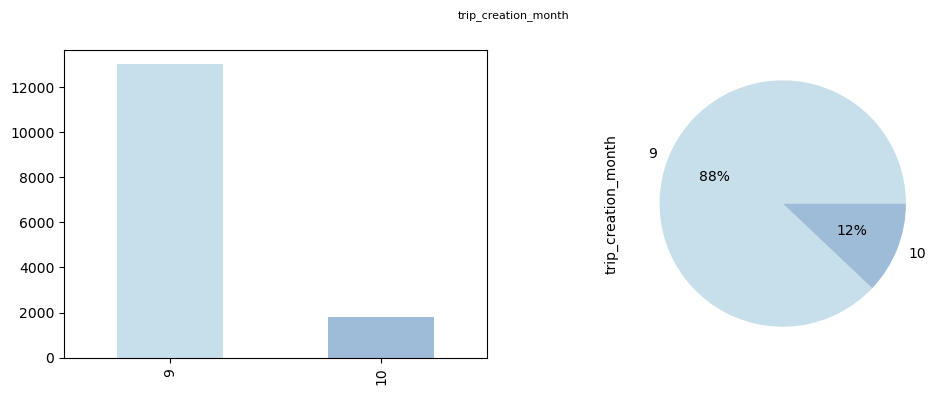

In [49]:
COLOR_PALETTE = sns.color_palette("ch:s=.25, rot=-.25")
def uni_barplot(df, col, axis, options): 
    df_count= df[col].value_counts() 
    df_count.plot.bar(color= COLOR_PALETTE, ax= axis) 
    return
def uni_pieplot(df, col, axis, options): 
    df_count= df[col].value_counts() 
    df_count.plot.pie(colors= COLOR_PALETTE, autopct= '%.0f%%', ax= axis) 
    return
col = ['trip_creation_month']
for i in range(len(col)): 
    fig, ax= plt.subplots(1, 2, figsize= (12, 4)) 
    plt.suptitle(col[i], fontsize= 8, fontweight= 8) 
    uni_barplot(d2, col[i], ax[0], { "nolabel": True }) 
    uni_pieplot(d2, col[i], ax[1], { "nolabel": True })

<div class="alert alert-block alert-warning">
    <b>Insight:</b><br> - Given data is of september and october. Therfore no further need to analysis on months
</div>

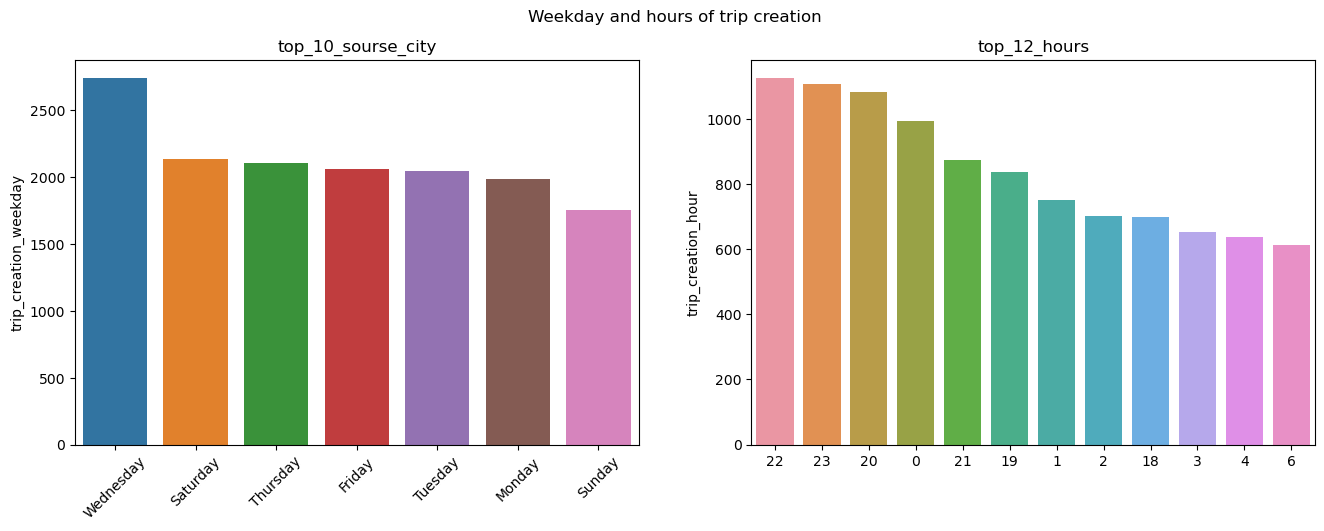

In [50]:
weekday = d2['trip_creation_weekday'].value_counts()
top_12_hours = d2['trip_creation_hour'].value_counts().iloc[0:12]

fig, ax= plt.subplots(1,2,figsize=(16,5))

sns.barplot(y = weekday, x = weekday.index,ax = ax[0] ).set(title= 'top_10_sourse_city')
ax[0].set_xticklabels(weekday.index,rotation = 45)

sns.barplot(y = top_12_hours, x = top_12_hours.index,ax = ax[1],order =top_12_hours.index  ).set(title= 'top_12_hours')

plt.suptitle("Weekday and hours of trip creation")
plt.show()

<div class="alert alert-block alert-warning">
    <b>Insight:</b> <br>-Most of the trips are on wednesday. <br>
        - Most of the trips are created during night time. Time span between 8:00 pm to 12:00 am is mostly used to creat trips
        .
</div>

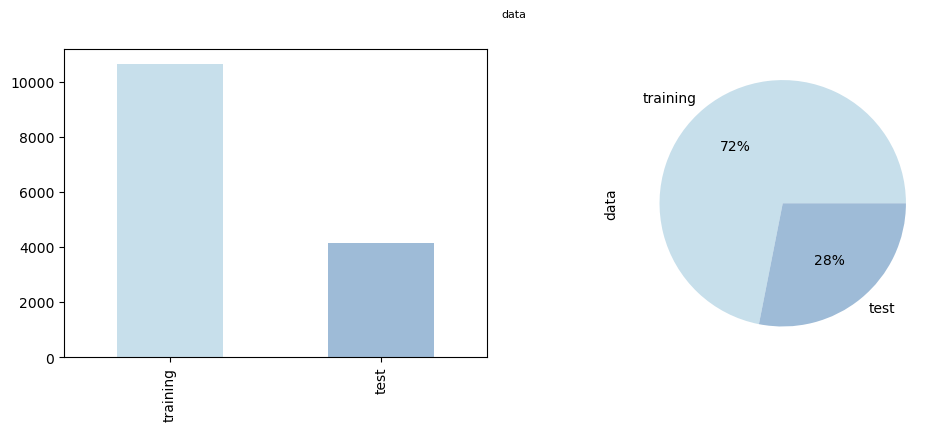

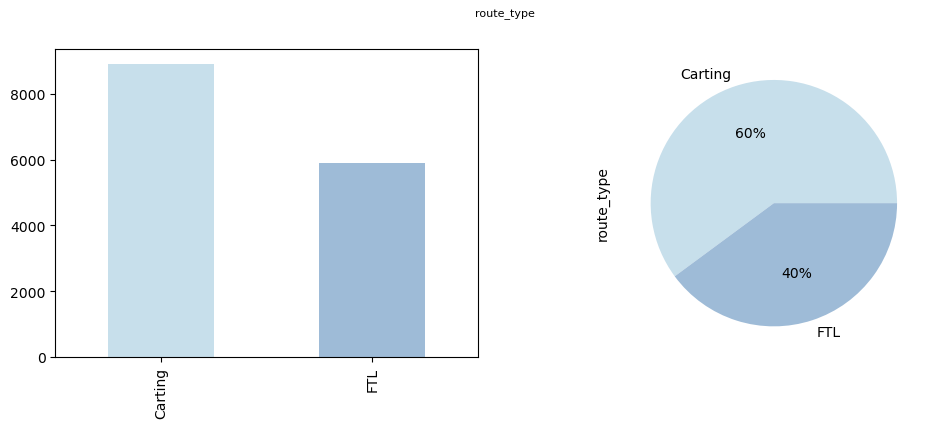

In [51]:
COLOR_PALETTE = sns.color_palette("ch:s=.25, rot=-.25")
def uni_barplot(df, col, axis, options): 
    df_count= df[col].value_counts() 
    df_count.plot.bar(color= COLOR_PALETTE, ax= axis) 
    return
def uni_pieplot(df, col, axis, options): 
    df_count= df[col].value_counts() 
    df_count.plot.pie(colors= COLOR_PALETTE, autopct= '%.0f%%', ax= axis) 
    return

for i in range(len(cat_cols)): 
    fig, ax= plt.subplots(1, 2, figsize= (12, 4)) 
    plt.suptitle(cat_cols[i], fontsize= 8, fontweight= 8) 
    uni_barplot(d2, cat_cols[i], ax[0], { "nolabel": True }) 
    uni_pieplot(d2, cat_cols[i], ax[1], { "nolabel": True })

<div class="alert alert-block alert-warning">
    <b>Insight:</b><br> - 60 % of deliveries uses carts.
</div>

# Bivariate analysis

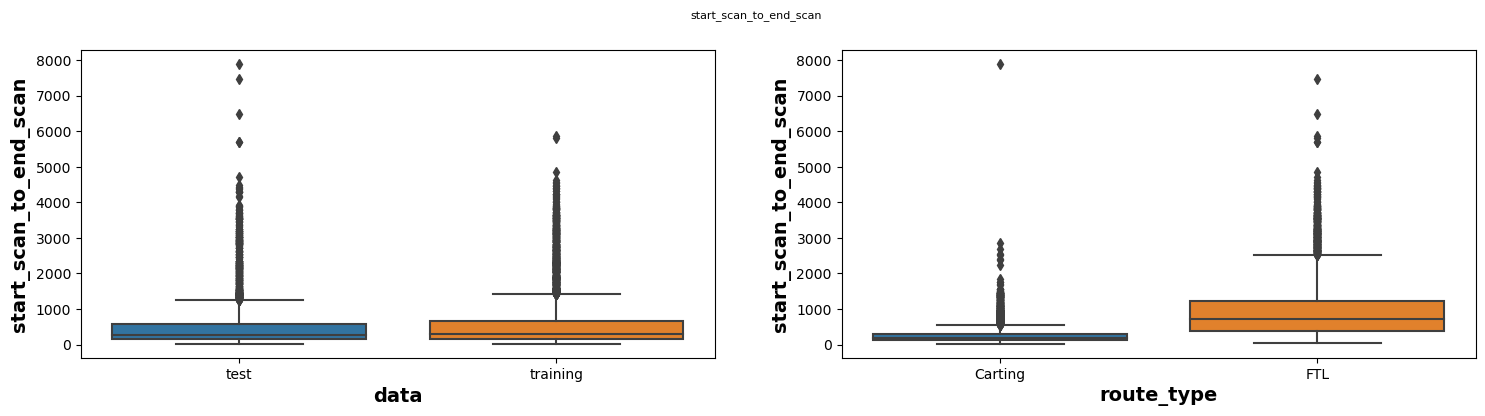

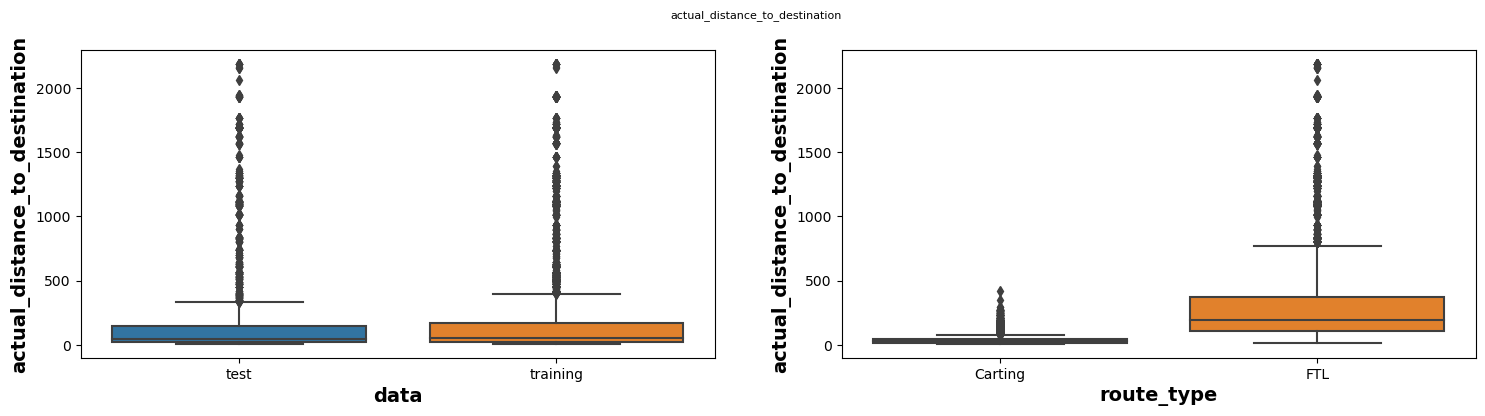

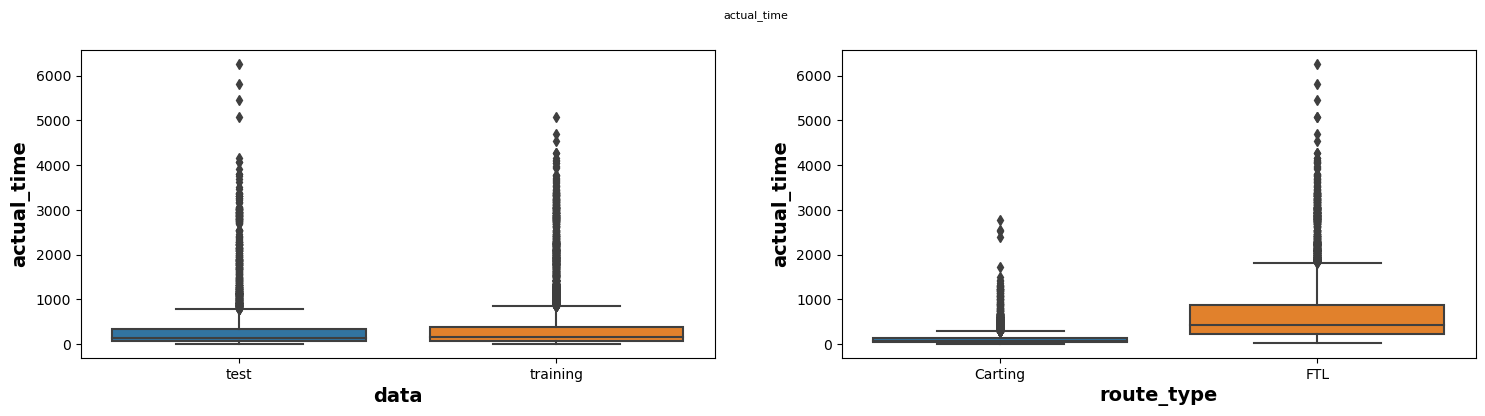

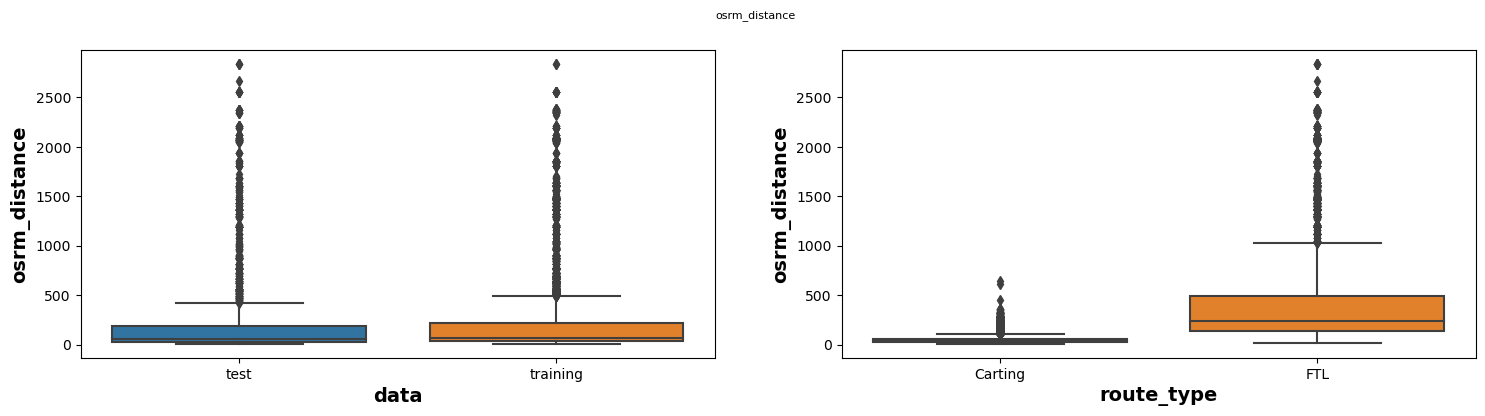

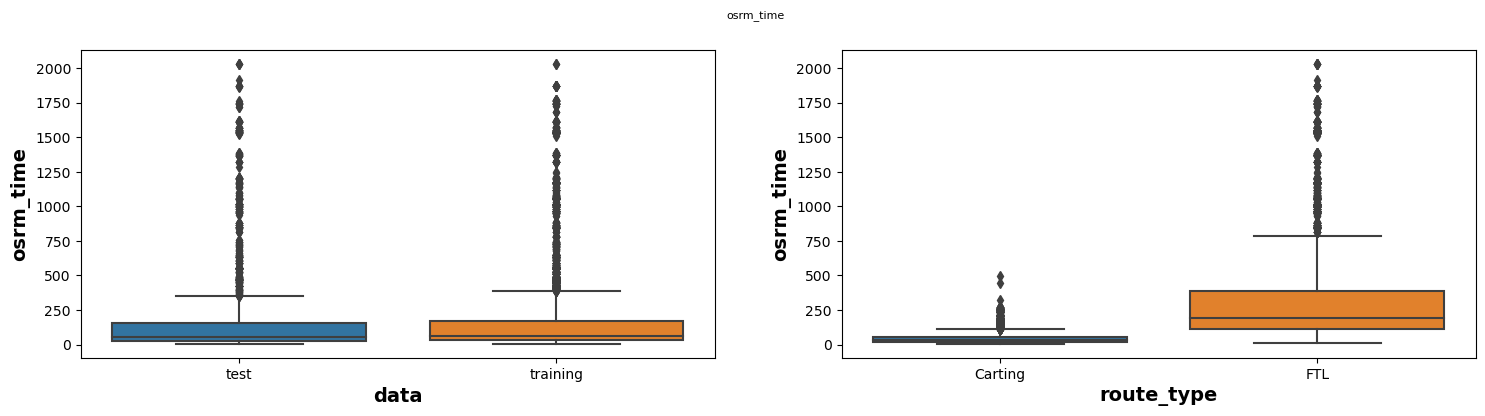

In [63]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_distance','osrm_time']
def boxplot_bicol(df,colname1, colname2,axis): 
    sns.boxplot(x= colname1,y= colname2, data= df,ax=axis)
    axis.set_xlabel(colname1, fontweight="bold",fontsize=14)
    axis.set_ylabel(colname2, fontweight="bold", fontsize=14)
for col in num_cols :
    fig, ax= plt.subplots(1, 2, figsize= (18, 4)) 
    plt.suptitle(col, fontsize= 8,fontweight= 8)
    boxplot_bicol(d2,"data",col,ax[0]) 
    boxplot_bicol(d2,"route_type",col,ax[1])


<div class="alert alert-block alert-warning">
    <b>Insight:</b><br> - Carting delhivery type is used for shorter distances as compared to FTH.
</div>

<AxesSubplot:>

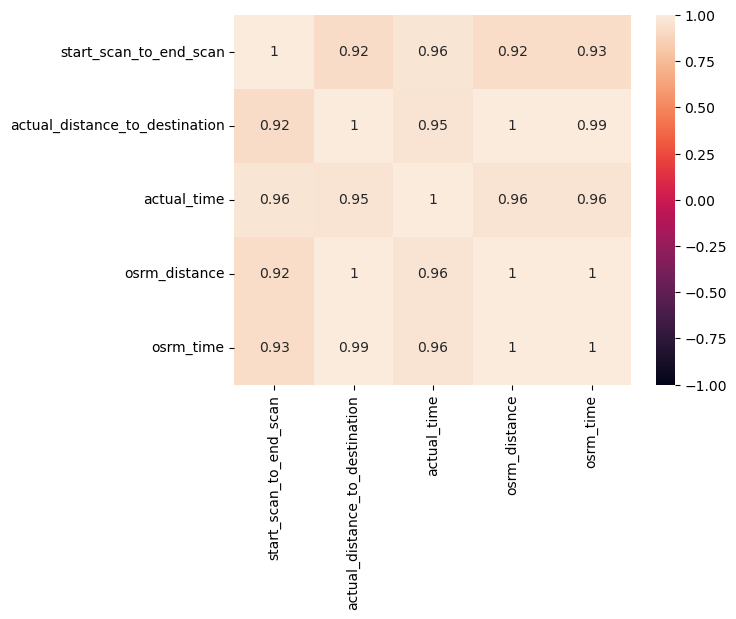

In [68]:
sns.heatmap(d2[num_cols].corr(),annot = True,vmin = -1,vmax = 1)

<div class="alert alert-block alert-warning">
    <b>Insight:</b><br> - So we seen certain fields are highly corelated:<br>
    -osrm_distance,actual distance to destination,osrm_time and actual time are higly corelated, which is expected becaus distance will effect the time taken for delhivery and actual and osrm are somewhat close to each other. 
</div>

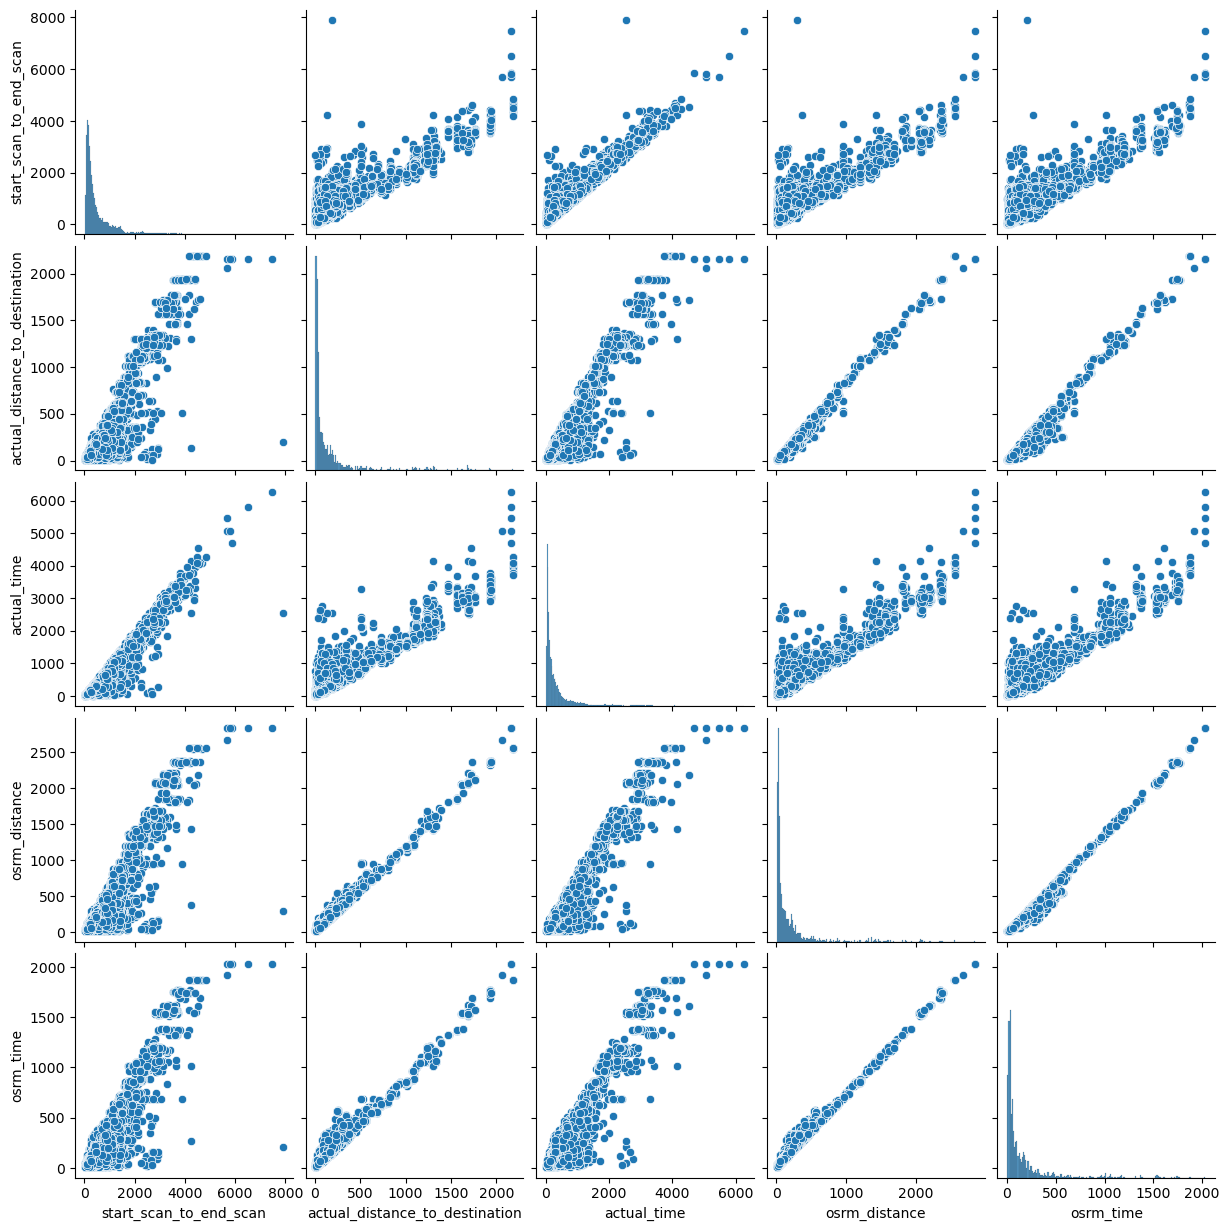

In [71]:
sns.color_palette("pastel")
sns.pairplot(d2[num_cols])
plt.show()

<div class="alert alert-block alert-warning">
    <b>Insight:</b><br> - all numerical features are lineraly realted to each other.
</div>

# Visual Bivariate Analysis

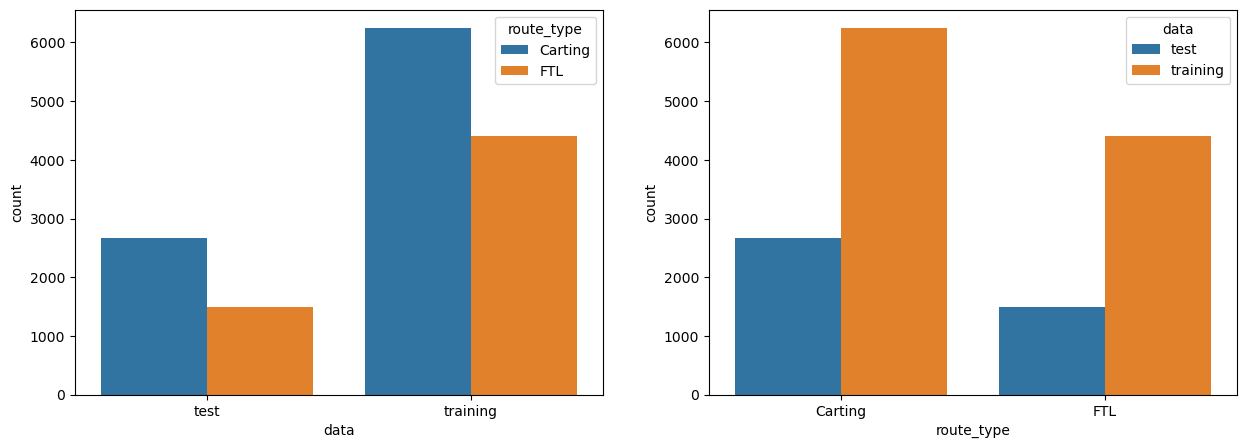

In [76]:
fig, ax= plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=d2,x="data",hue="route_type",ax =ax[0])
sns.countplot(data=d2,x="route_type",hue="data",ax= ax[1])
plt.show()

# Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

In [87]:
d2.iloc[:,5:15]

,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_distance,osrm_time,source_state
0,Dhule_MIDCAvdn_I (Maharashtra),Chalisgaon_BhadgDPP_D (Maharashtra),2018-09-27 00:02:18.970980,2018-09-27 02:28:08.036773,145.0,54.371063,128.0,57.5437,41.0,Maharashtra
1,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-27 00:02:29.352390,2018-09-27 01:23:35.904326,81.0,17.774611,58.0,21.7310,17.0,Maharashtra
2,Jaipur_Hub (Rajasthan),Gurgaon_Bilaspur_HB (Haryana),2018-09-27 00:03:08.209931,2018-09-27 10:13:54.663547,610.0,196.041263,334.0,220.8430,163.0,Rajasthan
3,Mumbai_Kalyan (Maharashtra),Mumbai_East_I_21 (Maharashtra),2018-09-27 02:37:15.362086,2018-09-27 04:21:45.871140,104.0,9.198088,27.0,11.5549,9.0,Maharashtra
4,Surat_Central_D_12 (Gujarat),Surat_Central_I_4 (Gujarat),2018-09-27 02:13:23.273586,2018-09-27 06:02:15.316360,228.0,13.411425,132.0,18.1836,17.0,Gujarat
...,...,...,...,...,...,...,...,...,...,...
14812,Vadodara_Karelibaug_DPC (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-26 23:49:57.087036,2018-09-27 01:37:01.468307,107.0,33.876461,47.0,45.7495,37.0,Gujarat
14813,Sivaganga_Wardno3_D (Tamil Nadu),Sivaganga_Wardno3_D (Tamil Nadu),2018-09-26 23:50:54.670423,2018-09-27 07:32:35.347845,459.0,174.336373,305.0,207.8727,163.0,TamilNadu
14814,Dhule_MIDCAvdn_I (Maharashtra),Malegaon_Rawlgaon_D (Maharashtra),2018-09-26 23:53:51.604388,2018-09-27 03:45:02.233834,230.0,103.789477,186.0,111.3083,93.0,Maharashtra
14815,Mainpuri_Agraroad_I (Uttar Pradesh),Mainpuri_Agraroad_I (Uttar Pradesh),2018-09-26 23:54:16.708455,2018-09-27 15:25:29.158990,818.0,235.890506,627.0,328.7627,329.0,UttarPradesh


In [96]:
d2['actual_time'].mean()

357.153944793143

In [90]:
d2['osrm_time'].mean()

162.07309171897145

we can see a lot difference between actual_time and osrm_time. But it needs to be proved statistically

H0 - mu1 = mu2  (no difference between mean)
Ha - mu1 +! mu  (difference between mean)

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.boxplot(data =d2,y='actual_time')
plt.subplot(122)
sns.boxplot(data =d2,y='osrm_time')